<a href="https://colab.research.google.com/github/DaviRogs/CdD-ML/blob/Organizada/RegressaoLogistica_DummyClassifier/testeModelosBaseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Carregando o dataset e removendo linhas que possam contar algum valor NaN, que interferem com o modelo de Regressão Logística, o impedindo de rodar.

In [8]:
# Carregando o dataset
df = pd.read_csv("https://media.githubusercontent.com/media/DaviRogs/CdD-ML/refs/heads/main/dados/df_consolidado.csv")

df = df.dropna()

# Exibindo as 5 primeiras linhas
print(df.info())


<ipython-input-8-a61dec50e6a7>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://media.githubusercontent.com/media/DaviRogs/CdD-ML/refs/heads/main/dados/df_consolidado.csv")


<class 'pandas.core.frame.DataFrame'>
Index: 1089222 entries, 2019 to 4954788
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id_votacao         1089222 non-null  object 
 1   id_deputado        1089222 non-null  int64  
 2   tipoVoto           1089222 non-null  object 
 3   siglaUf            1089222 non-null  object 
 4   id_partido         1089222 non-null  float64
 5   id_proposicao      1089222 non-null  int64  
 6   data               1089222 non-null  object 
 7   sigla_orgao        1089222 non-null  object 
 8   aprovacao          1089222 non-null  float64
 9   cod_tipo           1089222 non-null  int64  
 10  numero_proposicao  1089222 non-null  int64  
 11  ano                1089222 non-null  int64  
 12  orientacao         1089222 non-null  object 
 13  id_autor           1089222 non-null  float64
 14  tema               1089222 non-null  object 
dtypes: float64(3), int64(5), object(7)

Separando o dataset em features (X) e target (y).

In [9]:
X = df.drop(columns=["aprovacao"])
y = df["aprovacao"]

le = LabelEncoder()

for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col].astype(str))

print(X.head())

print("----------")

print(y.info())

      id_votacao  id_deputado  tipoVoto  siglaUf  id_partido  id_proposicao  \
2019         466       156190         1       22     37901.0         559138   
2022         466       156190         1       22     37901.0         559138   
2024         466       156190         1       22     37901.0         559138   
2026         466       156190         1       22     37901.0         559138   
2043         466       204528         1       25     37901.0         559138   

      data  sigla_orgao  cod_tipo  numero_proposicao   ano  orientacao  \
2019   182           12       139               6606  2019           4   
2022   182           12       139               6606  2019           4   
2024   182           12       139               6606  2019           4   
2026   182           12       139               6606  2019           4   
2043   182           12       139               6606  2019           4   

      id_autor  tema  
2019  160538.0    43  
2022   74784.0    43  
2024  16055

Divindo o data set em conjunto de teste e treino.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Aplicando o modelo baseline – DummyClassifier.

In [14]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

# Avaliação
print("Desempenho do DummyClassifier:")
print("Acurácia:", accuracy_score(y_test, y_pred_dummy))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dummy))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_dummy))


Desempenho do DummyClassifier:
Acurácia: 0.5657233353990222
Matriz de Confusão:
[[123240      0]
 [ 94605      0]]
Relatório de Classificação:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.57      1.00      0.72    123240
         1.0       0.00      0.00      0.00     94605

    accuracy                           0.57    217845
   macro avg       0.28      0.50      0.36    217845
weighted avg       0.32      0.57      0.41    217845



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Verificando os tipos de valores de cada coluna para que a Regressão Logística possa funcionar.

In [12]:
print(X_train.dtypes)


id_votacao             int64
id_deputado            int64
tipoVoto               int64
siglaUf                int64
id_partido           float64
id_proposicao          int64
data                   int64
sigla_orgao            int64
cod_tipo               int64
numero_proposicao      int64
ano                    int64
orientacao             int64
id_autor             float64
tema                   int64
dtype: object


Aplicando o modelo baseline – Regressão Logística.

In [13]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Avaliação
print("Desempenho da Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_logreg))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Desempenho da Regressão Logística:
Acurácia: 0.6672083362023457
Matriz de Confusão:
[[108542  14698]
 [ 57799  36806]]
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.65      0.88      0.75    123240
         1.0       0.71      0.39      0.50     94605

    accuracy                           0.67    217845
   macro avg       0.68      0.63      0.63    217845
weighted avg       0.68      0.67      0.64    217845



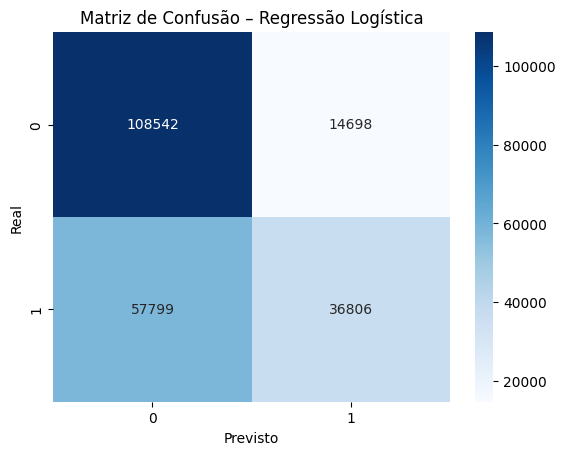

In [15]:
conf_mat = confusion_matrix(y_test, y_pred_logreg)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão – Regressão Logística")
plt.show()
